# Adult Income

## About Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

## Fields
The dataset contains 16 columns

Target filed: Income
-- The income is divide into two classes: <=50K and >50K

Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder

In [47]:
df = pd.read_csv('data/adult.csv')
df.head(10)

age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv        Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
4       Never-married                  ?      Own-child  White  Female   
5       Never-married      Other-service  Not-in-family  White    Male   
6       Never-married                  ?      Unmarried  Black    Male   
7  Married-civ-spouse     Prof-specialty        Husband  White    Male   
8       Never-married      Other-service      Unmarried  White  Female   
9  Married-civ-spouse       Craft-repair        Husband  White    Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K  
5             0             0              30  United-States  <=50K  
6             0             0              40  United-States  <=50K  
7          3103             0              32  United-States   >50K  
8             0             0              40  United-States  <=50K  
9             0             0              10  United-States  <=50K

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [49]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [50]:
df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

<Axes: xlabel='income'>

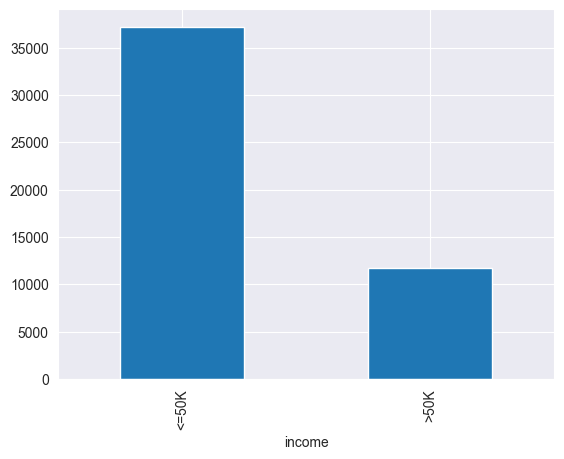

In [51]:
df['income'].value_counts().plot.bar()

In [52]:
def set_income(val):
    return 1 if val == '>50K' else 0

In [53]:
df['income'] = df['income'].apply(set_income)
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  income  
0                 0             0              40  United-States       0  
1                 0             0              50  United-States       0  
2                 0             0              40  United-States       1  
3              7688             0              40  United-States       1  
4                 0             0              30  United-States       0  
...             ...           ...             ...            ...     ...  
48837             0             0              38  United-States       0  
48838             0             0              40  United-States       1  
48839             0             0              40  United-States       0  
48840             0             0              20  United-States       0  
48841         15024             0              40  United-States       1  

[48842 rows x 15 columns]

In [54]:
df['income'].value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

## Data Preparation and Visualisation

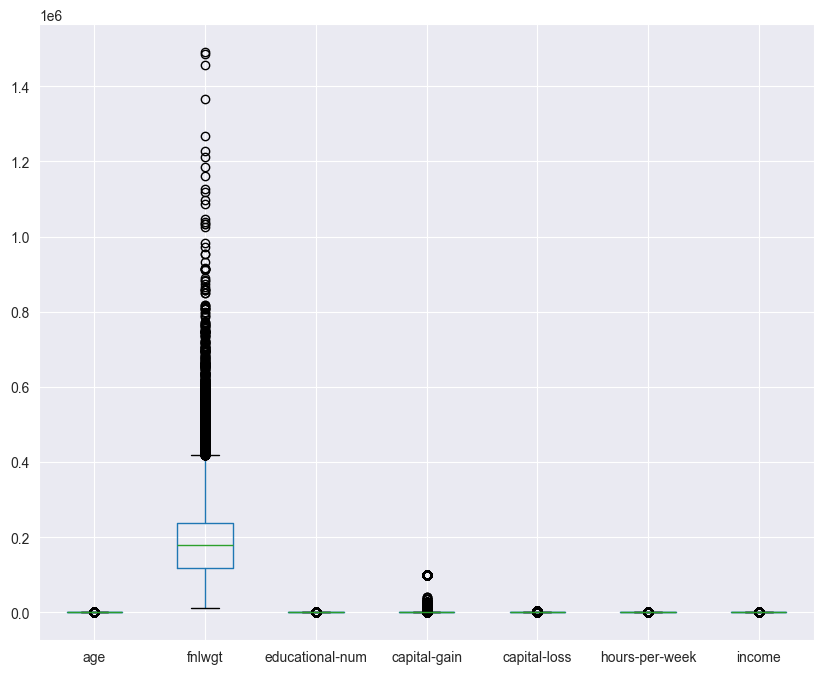

In [55]:
plt.figure(figsize = (10,8))
df.boxplot()
plt.show()

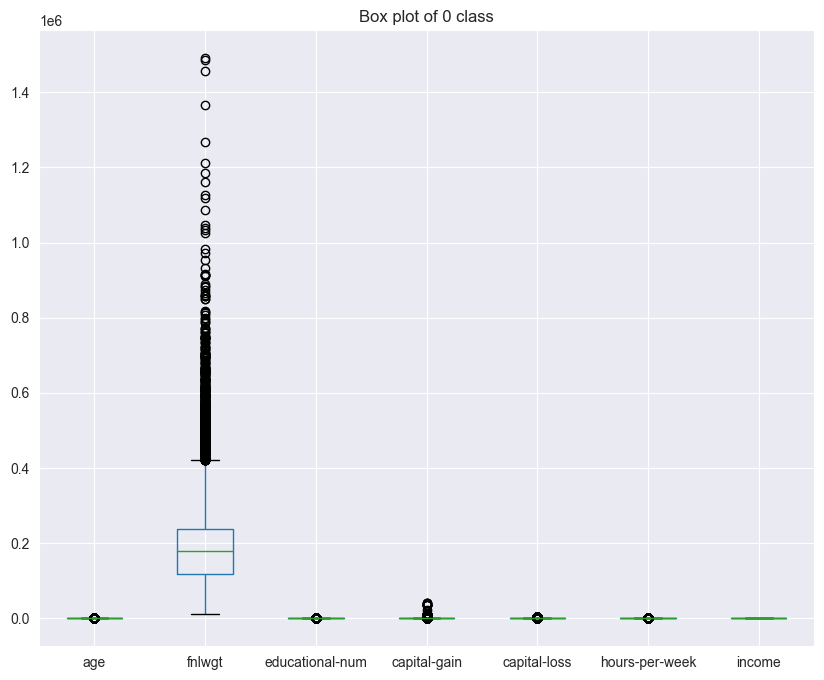

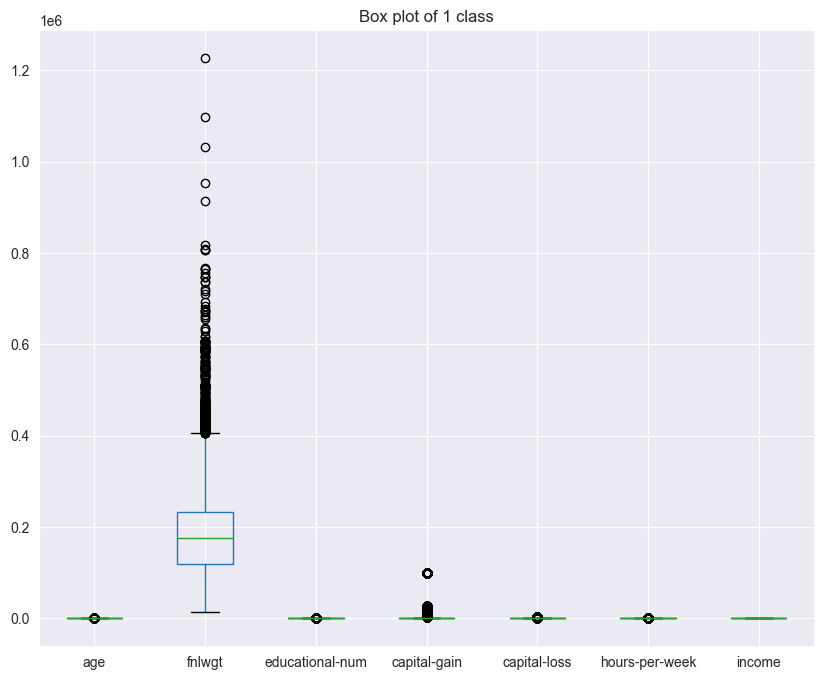

In [56]:
unique_class = df['income'].unique()
for i in unique_class:
    plt.figure(figsize = (10,8))
    df[df['income'] == i].boxplot()
    plt.title('Box plot of {i} class'.format(i=i))
    plt.show()

Заклучок: Бидејќи outlier-те во овој случај само  kaj атрибутот 'fnlwgt' отстапува премногу од интервалот следува дека ќе се направи  отфрлање на оние податоци каде овој атрибут отстапува од интервалот на доверба.

In [57]:
Q1 = df['fnlwgt'].quantile(0.25)
Q3 = df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['fnlwgt'] >= lower) & (df['fnlwgt'] <= upper)]
df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  income  
0                 0             0              40  United-States       0  
1                 0             0              50  United-States       0  
2                 0             0              40  United-States       1  
3              7688             0              40  United-States       1  
4                 0             0              30  United-States       0  
...             ...           ...             ...            ...     ...  
48837             0             0              38  United-States       0  
48838             0             0              40  United-States       1  
48839             0             0              40  United-States       0  
48840             0             0              20  United-States       0  
48841         15024             0              40  United-States       1  

[47389 rows x 15 columns]

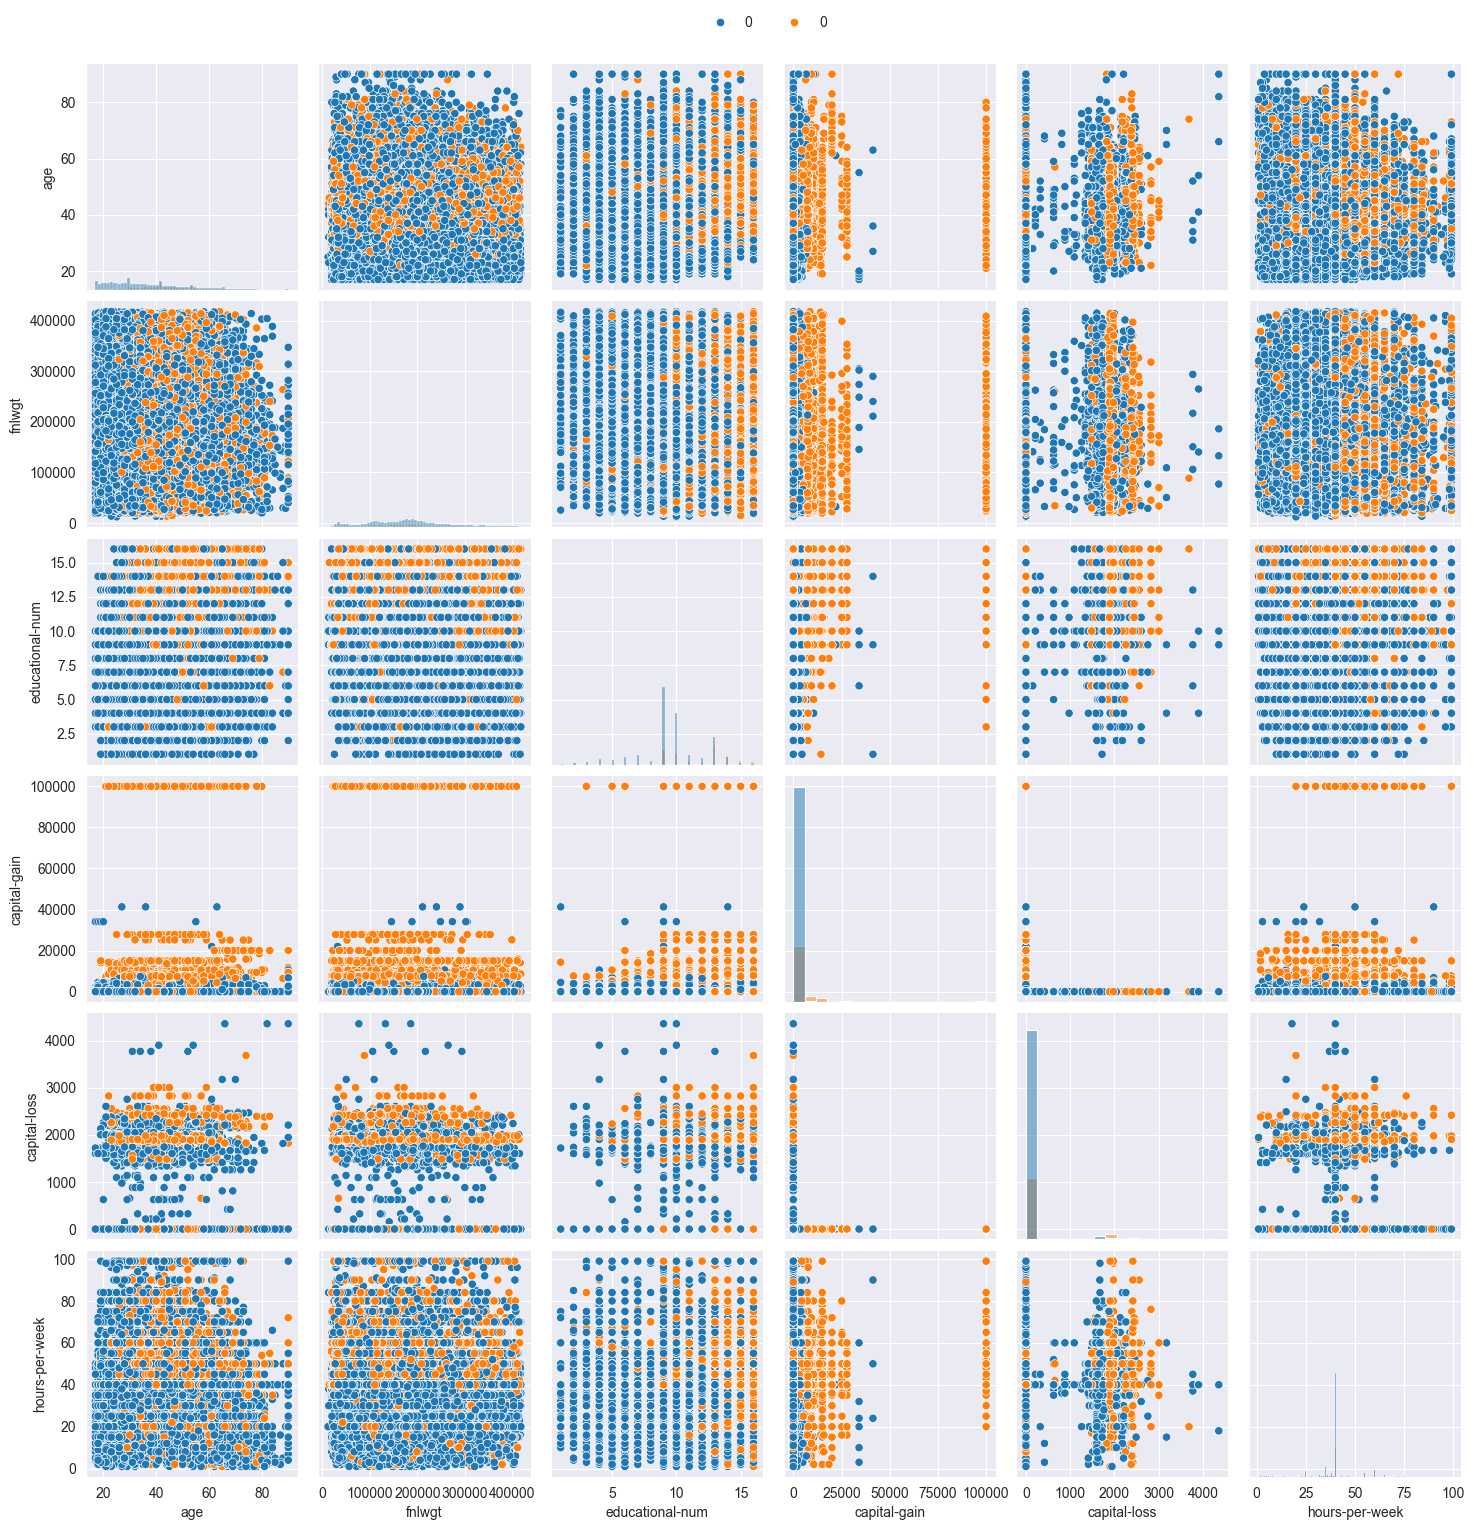

In [58]:
g=sns.pairplot(df, hue="income", diag_kind="hist")
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=2, title=None)
for t, l in zip(g._legend.texts, df['income']):
    t.set_text(l)

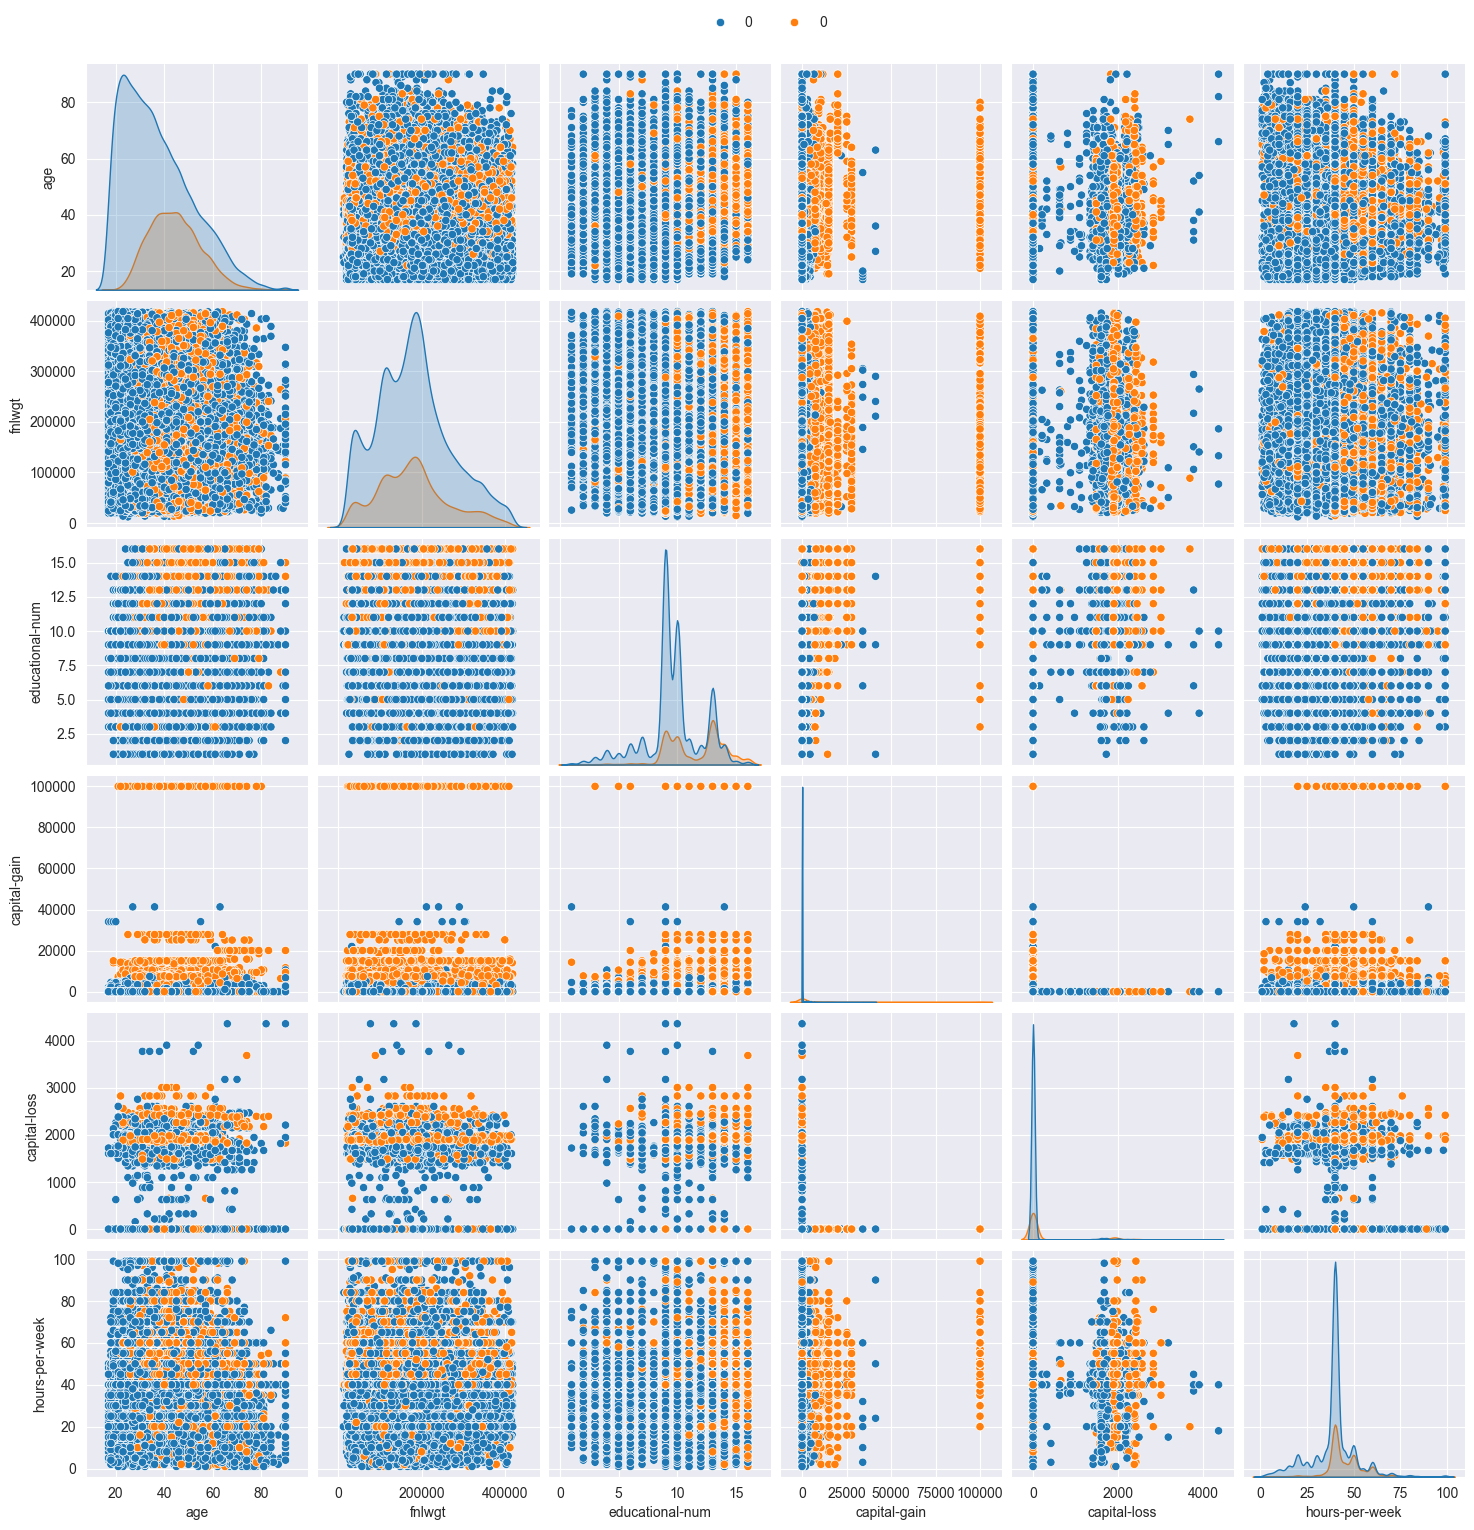

In [59]:
g=sns.pairplot(df, hue="income", diag_kind="kde")
sns.move_legend(g, "lower center",bbox_to_anchor=(.5, 1),ncol=2, title=None)
for t, l in zip(g._legend.texts, df['income']):
    t.set_text(l)

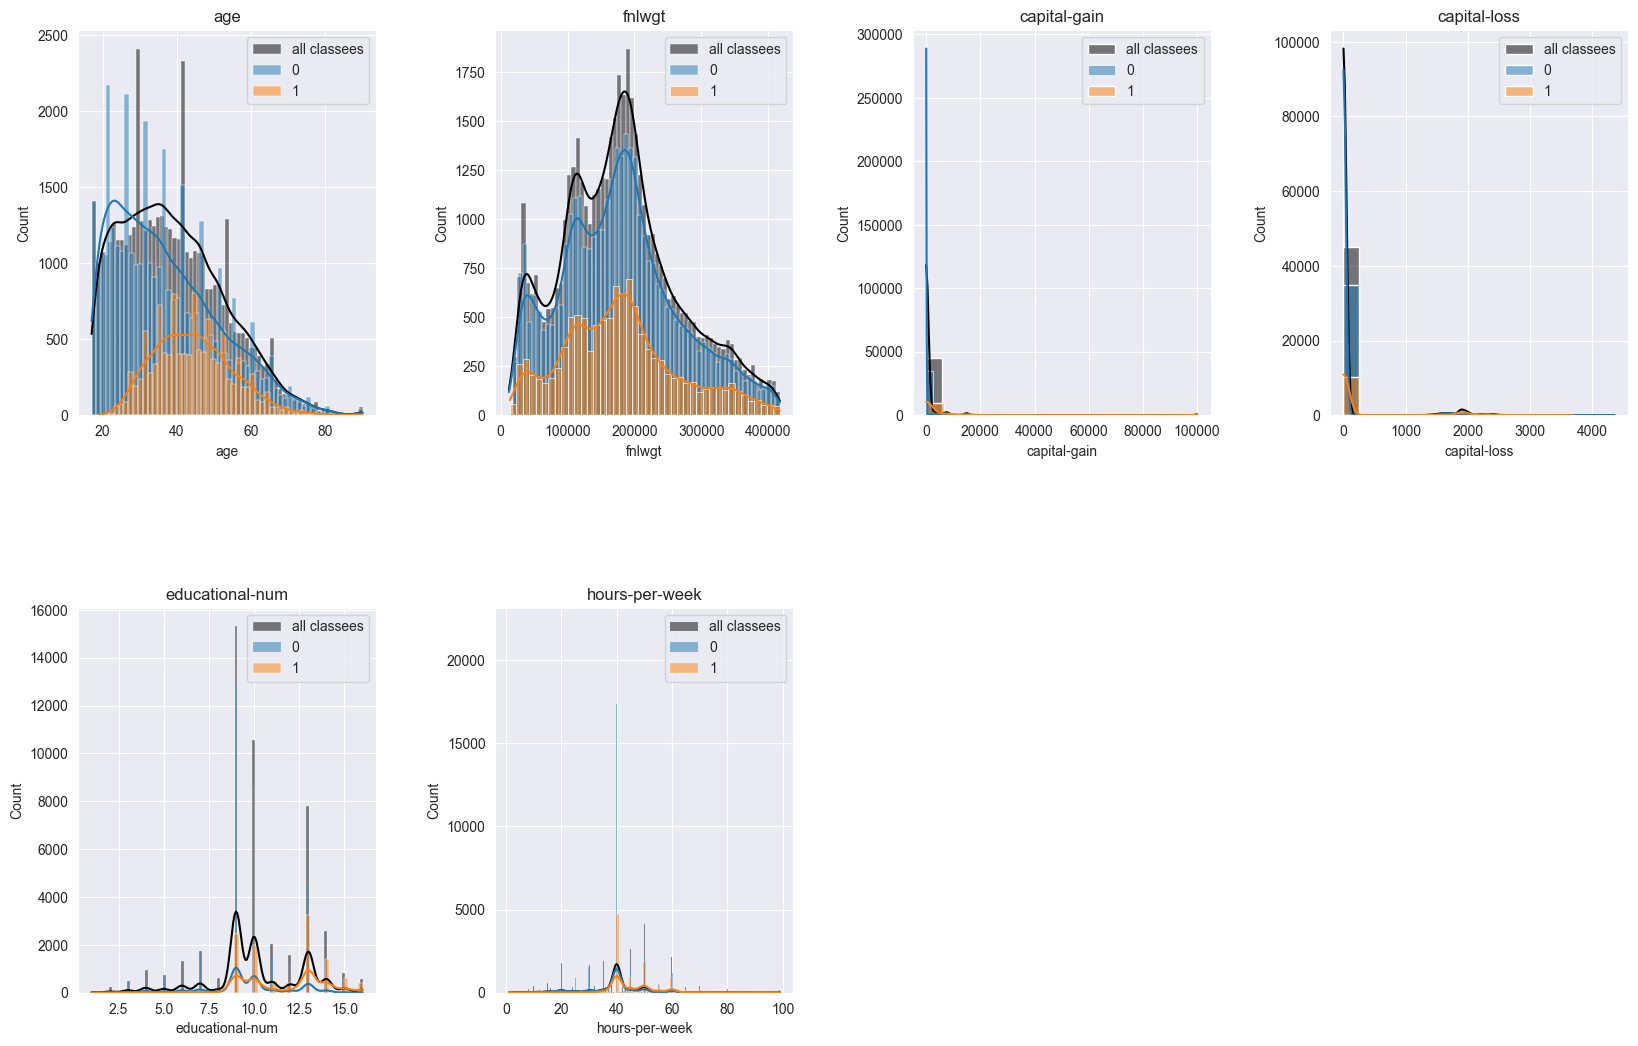

In [60]:
all_features = ['age','fnlwgt','capital-gain','capital-loss','educational-num','hours-per-week']
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.5, wspace=0.4) 
n_features = len(all_features)
for f in range(n_features):
    ax = plt.subplot(3,4,f+1)
    plt.title(all_features[f])
    sns.histplot(df[all_features[f]],color='black',label='all classees',kde=True,stat="count") 
    for t in range(len(unique_class)): # се прикажува хистограм на вредностите на соодветниот атрибут за секоја класа посебно
        sns.histplot(df[df['income'] == unique_class[t]][all_features[f]], 
                 label=unique_class[t], kde=True, stat="count")
    plt.legend()
plt.show()

<Axes: >

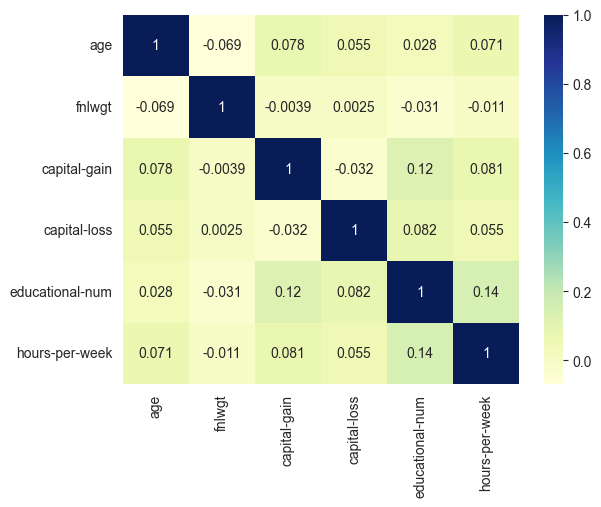

In [61]:
sns.heatmap(df[all_features].corr(),annot=True,cmap="YlGnBu")

In [62]:
def label_encoder(df:pd.DataFrame,columns:list):
    for col in columns:
        encoder = LabelEncoder()
        hasUnknown = (df[col] == "?").any()
        df[col] = encoder.fit_transform(df[col].astype(str))
        if hasUnknown:
            has_unknown = encoder.transform(["?"])[0]
            df.loc[df[col] == has_unknown, col] = np.nan
    
    return df

In [63]:
df = label_encoder(df,['workclass','education','marital-status','occupation','relationship','race','gender','native-country'])
df

C:\Users\Jovan\AppData\Local\Temp\ipykernel_23308\882322347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col].astype(str))
C:\Users\Jovan\AppData\Local\Temp\ipykernel_23308\882322347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col].astype(str))
C:\Users\Jovan\AppData\Local\Temp\ipykernel_23308\882322347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25        4.0  226802          1                7               4   
1       38        4.0   89814         11                9               2   
2       28        2.0  336951          7               12               2   
3       44        4.0  160323         15               10               2   
4       18        NaN  103497         15               10               4   
...    ...        ...     ...        ...              ...             ...   
48837   27        4.0  257302          7               12               2   
48838   40        4.0  154374         11                9               2   
48839   58        4.0  151910         11                9               6   
48840   22        4.0  201490         11                9               4   
48841   52        5.0  287927         11                9               2   

       occupation  relationship  race  gender  capital-gain  capital-loss  \
0             7.0             3     2       1             0             0   
1             5.0             0     4       1             0             0   
2            11.0             0     4       1             0             0   
3             7.0             0     2       1          7688             0   
4             NaN             3     4       0             0             0   
...           ...           ...   ...     ...           ...           ...   
48837        13.0             5     4       0             0             0   
48838         7.0             0     4       1             0             0   
48839         1.0             4     4       0             0             0   
48840         1.0             3     4       1             0             0   
48841         4.0             5     4       0         15024             0   

       hours-per-week  native-country  income  
0                  40            39.0       0  
1                  50            39.0       0  
2                  40            39.0       1  
3                  40            39.0       1  
4                  30            39.0       0  
...               ...             ...     ...  
48837              38            39.0       0  
48838              40            39.0       1  
48839              40            39.0       0  
48840              20            39.0       0  
48841              40            39.0       1  

[47389 rows x 15 columns]

In [65]:
df['workclass'].value_counts()

workclass
4.0    32851
6.0     3781
2.0     3065
7.0     1915
5.0     1661
1.0     1374
8.0       21
3.0        9
Name: count, dtype: int64

In [68]:
iterative_model = IterativeImputer()
imputed_values = iterative_model.fit_transform(df[['workclass','education','marital-status','occupation','relationship','race','gender','native-country']])
df[['workclass','education','marital-status','occupation','relationship','race','gender','native-country']]= imputed_values
df

C:\Users\Jovan\AppData\Local\Temp\ipykernel_23308\609761617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['workclass','education','marital-status','occupation','relationship','race','gender','native-country']]= imputed_values


age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25   4.000000  226802        1.0                7             4.0   
1       38   4.000000   89814       11.0                9             2.0   
2       28   2.000000  336951        7.0               12             2.0   
3       44   4.000000  160323       15.0               10             2.0   
4       18   4.019198  103497       15.0               10             4.0   
...    ...        ...     ...        ...              ...             ...   
48837   27   4.000000  257302        7.0               12             2.0   
48838   40   4.000000  154374       11.0                9             2.0   
48839   58   4.000000  151910       11.0                9             6.0   
48840   22   4.000000  201490       11.0                9             4.0   
48841   52   5.000000  287927       11.0                9             2.0   

       occupation  relationship  race  gender  capital-gain  capital-loss  \
0        7.000000           3.0   2.0     1.0             0             0   
1        5.000000           0.0   4.0     1.0             0             0   
2       11.000000           0.0   4.0     1.0             0             0   
3        7.000000           0.0   2.0     1.0          7688             0   
4        6.563828           3.0   4.0     0.0             0             0   
...           ...           ...   ...     ...           ...           ...   
48837   13.000000           5.0   4.0     0.0             0             0   
48838    7.000000           0.0   4.0     1.0             0             0   
48839    1.000000           4.0   4.0     0.0             0             0   
48840    1.000000           3.0   4.0     1.0             0             0   
48841    4.000000           5.0   4.0     0.0         15024             0   

       hours-per-week  native-country  income  
0                  40            39.0       0  
1                  50            39.0       0  
2                  40            39.0       1  
3                  40            39.0       1  
4                  30            39.0       0  
...               ...             ...     ...  
48837              38            39.0       0  
48838              40            39.0       1  
48839              40            39.0       0  
48840              20            39.0       0  
48841              40            39.0       1  

[47389 rows x 15 columns]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47389 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              47389 non-null  int64  
 1   workclass        47389 non-null  float64
 2   fnlwgt           47389 non-null  int64  
 3   education        47389 non-null  float64
 4   educational-num  47389 non-null  int64  
 5   marital-status   47389 non-null  float64
 6   occupation       47389 non-null  float64
 7   relationship     47389 non-null  float64
 8   race             47389 non-null  float64
 9   gender           47389 non-null  float64
 10  capital-gain     47389 non-null  int64  
 11  capital-loss     47389 non-null  int64  
 12  hours-per-week   47389 non-null  int64  
 13  native-country   47389 non-null  float64
 14  income           47389 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 5.8 MB


## Training the models

In [71]:
X,y = df.drop('income', axis=1), df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes

In [72]:
model = GaussianNB()
model.fit(X_train, y_train)
print(f'Prior: {model.class_prior_}')

Prior: [0.75830234 0.24169766]


In [73]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test, pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7262
           1       0.64      0.31      0.42      2216

    accuracy                           0.80      9478
   macro avg       0.73      0.63      0.65      9478
weighted avg       0.78      0.80      0.77      9478



<Axes: >

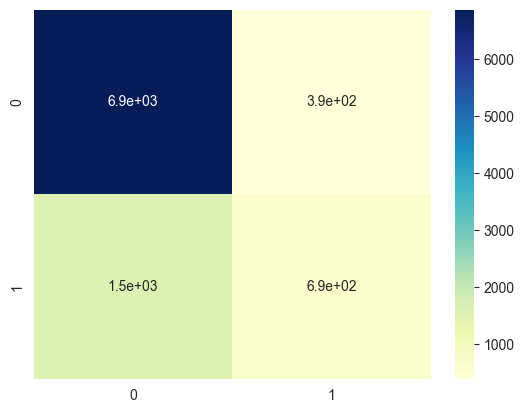

In [74]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")

### LDA

In [76]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Prior: {model.priors_}')

Prior: [0.75830234 0.24169766]


In [77]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test, pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7262
           1       0.68      0.41      0.51      2216

    accuracy                           0.82      9478
   macro avg       0.76      0.68      0.70      9478
weighted avg       0.80      0.82      0.80      9478



<Axes: >

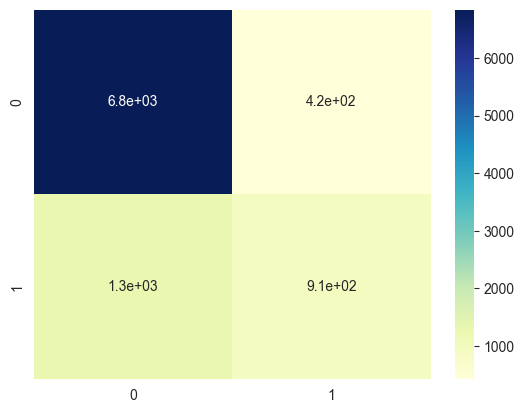

In [78]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")

### QDA

In [79]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
print(f'Prior: {model.priors_}')

Prior: [0.75830234 0.24169766]


In [80]:
pred = model.predict(X_test)
print('Classification Report')
print(classification_report(y_test, pred,zero_division=0))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7262
           1       0.68      0.34      0.45      2216

    accuracy                           0.81      9478
   macro avg       0.75      0.64      0.67      9478
weighted avg       0.79      0.81      0.78      9478



<Axes: >

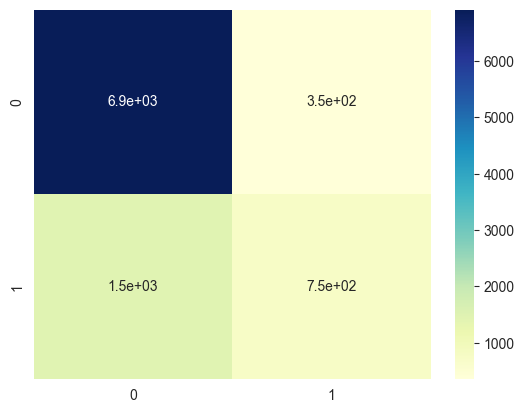

In [81]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,cmap="YlGnBu")

## Заклучок:
Со користење на наивен баесов класификатор заедно со дискриминантните анализа QDA LDA кои работат заедно на ист принцип може да заклучи дека трите модела имаат многу добри перформанси во предвидување на месечниот приход на индивидуалец од кои најдобар од трите модели е LDA.